# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [2]:
df_abalone=pd.read_csv('abalone.csv')
df_abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df_abalone.drop(df_abalone.columns[[0]],axis=1,inplace=True)

# EXPLORATORY DATA ANALYSIS

In [4]:
df_abalone.head()

,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df_abalone.tail()

,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
df_abalone.shape

(4177, 8)

In [7]:
df_abalone.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked Weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df_abalone.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked Weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked Weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [10]:
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


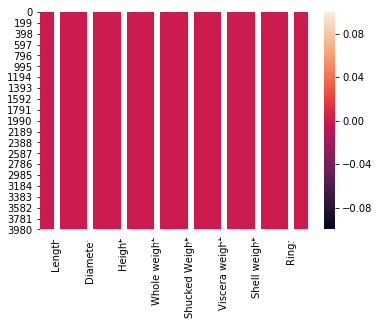

In [11]:
sns.heatmap(df_abalone.isnull(),annot=True)

In [12]:
df_abalone.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked Weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

CHECKING DATA SKEWNESS

In [13]:
for col in df_abalone.columns:
    if df_abalone.skew().loc[col]>0.55:
        df_abalone[col]=np.log1p(df_abalone[col])
df_abalone.skew()

Length           -0.639873
Diameter         -0.609198
Height            1.099602
Whole weight      0.530959
Shucked Weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
Rings            -0.061317
dtype: float64

CHECKING OUTLIERS

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(df_abalone))
print(z.shape)
print(np.where(z>3))

(4177, 8)
(array([ 129,  163,  164,  165,  165,  166,  168,  236,  236,  236,  236,
        237,  237,  237,  238,  238,  238,  239,  294,  306,  358,  480,
        520,  526,  526,  526,  694,  694,  696,  696,  719,  719,  719,
        720,  720,  720,  891,  891,  894, 1051, 1052, 1054, 1174, 1204,
       1207, 1207, 1209, 1209, 1257, 1417, 1422, 1427, 1427, 1428, 1429,
       1429, 1429, 1528, 1762, 1762, 1763, 1763, 1763, 1986, 1987, 1987,
       2051, 2108, 2108, 2114, 2114, 2115, 2157, 2161, 2169, 2201, 2209,
       2334, 2334, 2371, 2381, 2623, 2624, 2711, 2811, 2811, 2862, 2863,
       3007, 3008, 3149, 3151, 3280, 3427, 3427, 3472, 3521, 3599, 3599,
       3713, 3715, 3715, 3715, 3800, 3801, 3837, 3899, 3899, 3902, 3902,
       3996], dtype=int64), array([6, 6, 6, 3, 6, 6, 6, 0, 1, 2, 7, 0, 1, 7, 0, 1, 7, 0, 7, 7, 3, 7,
       7, 0, 1, 7, 1, 2, 0, 1, 0, 1, 7, 0, 1, 7, 3, 6, 7, 3, 3, 7, 2, 5,
       3, 4, 3, 4, 2, 2, 5, 3, 4, 6, 0, 1, 7, 4, 3, 5, 3, 4, 5, 0, 0, 1,
       2, 6,

REMOVING OUTLIERS

In [15]:
df_final=df_abalone.loc[(z<3).all(axis=1)]
print(df_final.shape)

(4102, 8)


CORRELATION

In [16]:
df_final.corr()

,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.985721,0.899377,0.933430,0.931110,0.921788,0.926399,0.620647
Diameter,0.985721,1.000000,0.905764,0.932526,0.925364,0.917511,0.933514,0.637832
Height,0.899377,0.905764,1.000000,0.891555,0.860573,0.880470,0.909919,0.661600
Whole weight,0.933430,0.932526,0.891555,1.000000,0.971295,0.968058,0.959746,0.583294
Shucked Weight,0.931110,0.925364,0.860573,0.971295,1.000000,0.938165,0.904140,0.501674
Viscera weight,0.921788,0.917511,0.880470,0.968058,0.938165,1.000000,0.923226,0.568636
Shell weight,0.926399,0.933514,0.909919,0.959746,0.904140,0.923226,1.000000,0.670771
Rings,0.620647,0.637832,0.661600,0.583294,0.501674,0.568636,0.670771,1.000000


In [17]:
df_final.skew()

Length           -0.589712
Diameter         -0.571232
Height           -0.279593
Whole weight      0.398898
Shucked Weight    0.224995
Viscera weight    0.314300
Shell weight      0.201453
Rings             0.088865
dtype: float64

# DATAFRAME

In [18]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

      Length  Diameter    Height  Whole weight  Shucked Weight  \
0      0.455     0.365  0.090754        0.5140        0.202533   
1      0.350     0.265  0.086178        0.2255        0.094856   
2      0.530     0.420  0.126633        0.6770        0.228330   
3      0.440     0.365  0.117783        0.5160        0.195156   
4      0.330     0.255  0.076961        0.2050        0.085719   
...      ...       ...       ...           ...             ...   
4172   0.565     0.450  0.152721        0.8870        0.314811   
4173   0.590     0.440  0.126633        0.9660        0.363948   
4174   0.600     0.475  0.186480        1.1760        0.422322   
4175   0.625     0.485  0.139762        1.0945        0.425921   
4176   0.710     0.555  0.178146        1.9485        0.665519   

      Viscera weight  Shell weight  
0           0.096219      0.139762  
1           0.047361      0.067659  
2           0.132343      0.190620  
3           0.107957      0.144100  
4           0.038740  

In [19]:
x=df_x

PAIRPLOT

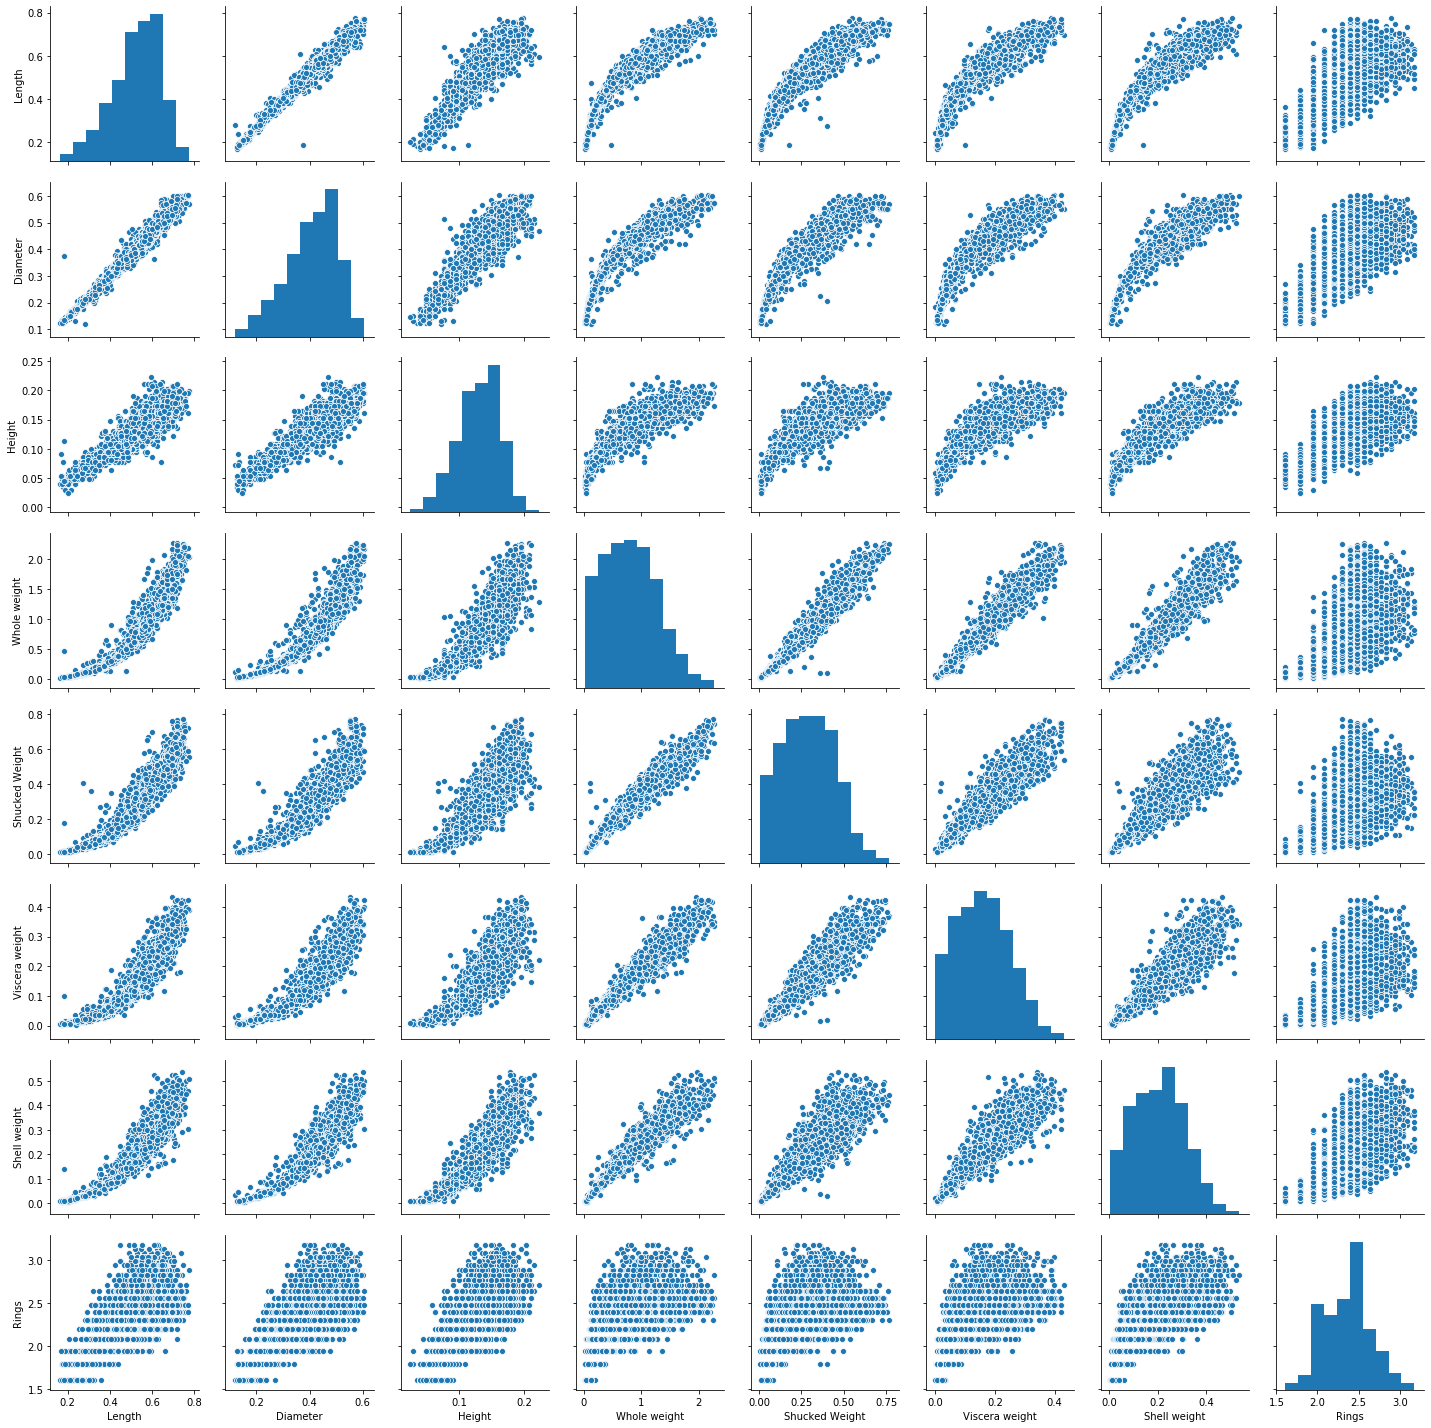

In [20]:
sns.pairplot(df_final)

# TRAINING AND TESTING - VARIOUS MODELS

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

FUNCTION DECLARATION

In [22]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("R2 Score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("Maximum R2 Score corresponds to ",final_r_state," is ",max_r_score)
    return(final_r_state)

LINEAR REGRESSION

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

R2 Score corresponding to  42  is  0.5744942997405407
R2 Score corresponding to  43  is  0.5712089990832265
R2 Score corresponding to  44  is  0.5869342590176883
R2 Score corresponding to  45  is  0.5598986843684178
R2 Score corresponding to  46  is  0.5990967040656812
R2 Score corresponding to  47  is  0.5355900971248169
R2 Score corresponding to  48  is  0.5723631050307267
R2 Score corresponding to  49  is  0.5995089171733252
R2 Score corresponding to  50  is  0.5930364516521692
R2 Score corresponding to  51  is  0.5422585183961826
R2 Score corresponding to  52  is  0.5773656572987946
R2 Score corresponding to  53  is  0.5809506281822763
R2 Score corresponding to  54  is  0.586876886155556
R2 Score corresponding to  55  is  0.5822375725044584
R2 Score corresponding to  56  is  0.5666929633014397
R2 Score corresponding to  57  is  0.5927092192630941
R2 Score corresponding to  58  is  0.5833153876604507
R2 Score corresponding to  59  is  0.5586334016866124
R2 Score corresponding to  60

In [24]:
print("Mean R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').mean())
print("Standard Deviation in R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').std())

Mean R2 Score for Linear Regression is  0.4548984306034704
Standard Deviation in R2 Score for Linear Regression is  0.11003054377866911


KNEIGHBORS REGRESSOR

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(df_x,y)
gknr.best_params_

{'n_neighbors': 19}

In [26]:
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,x,y)

R2 Score corresponding to  42  is  0.6208917600577293
R2 Score corresponding to  43  is  0.6015808341277399
R2 Score corresponding to  44  is  0.6147612210132991
R2 Score corresponding to  45  is  0.5925099517869024
R2 Score corresponding to  46  is  0.6424016854410652
R2 Score corresponding to  47  is  0.5928903887127595
R2 Score corresponding to  48  is  0.6035573282474058
R2 Score corresponding to  49  is  0.62172145512928
R2 Score corresponding to  50  is  0.6329692375353453
R2 Score corresponding to  51  is  0.5690283699650407
R2 Score corresponding to  52  is  0.6001282449691925
R2 Score corresponding to  53  is  0.6094251920077414
R2 Score corresponding to  54  is  0.6164359207873076
R2 Score corresponding to  55  is  0.5918242594973961
R2 Score corresponding to  56  is  0.6177379294423345
R2 Score corresponding to  57  is  0.6202478403106816
R2 Score corresponding to  58  is  0.6025279518369795
R2 Score corresponding to  59  is  0.6063868421550545
R2 Score corresponding to  60 

In [27]:
print("Mean R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=10,scoring='r2').std())

Mean R2 Score for KNN Regression is  0.5348070683968196
Standard Deviation in R2 Score for KNN Regression is  0.07069575477260859


LASSO REGRESSION

In [28]:
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [29]:
ls=Lasso(alpha=0.001)
r_state=maxr2_score(ls,x,y)

R2 Score corresponding to  42  is  0.5330332631235108
R2 Score corresponding to  43  is  0.5317970787789689
R2 Score corresponding to  44  is  0.5472372501325875
R2 Score corresponding to  45  is  0.5067815194606495
R2 Score corresponding to  46  is  0.5466989695824487
R2 Score corresponding to  47  is  0.48721405503371906
R2 Score corresponding to  48  is  0.5413775331389371
R2 Score corresponding to  49  is  0.5586458420416316
R2 Score corresponding to  50  is  0.5384777018260909
R2 Score corresponding to  51  is  0.492092827073342
R2 Score corresponding to  52  is  0.5255556051403152
R2 Score corresponding to  53  is  0.5314089918430152
R2 Score corresponding to  54  is  0.5468055493427626
R2 Score corresponding to  55  is  0.5354488272977768
R2 Score corresponding to  56  is  0.5230140986524539
R2 Score corresponding to  57  is  0.5233240790718585
R2 Score corresponding to  58  is  0.5489138189678086
R2 Score corresponding to  59  is  0.5297897462328272
R2 Score corresponding to  6

In [30]:
print("Mean R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Lasso Regression is  0.4268267689087518
Standard Deviation in R2 Score for Lasso Regression is  0.09493905599665241


RIDGE REGRESSION

In [31]:
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rd,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [32]:
rd=Ridge(alpha=0.1)
r_state=maxr2_score(rd,x,y)

R2 Score corresponding to  42  is  0.574802187435168
R2 Score corresponding to  43  is  0.5714269756349161
R2 Score corresponding to  44  is  0.5871997548480028
R2 Score corresponding to  45  is  0.5597056790424151
R2 Score corresponding to  46  is  0.5983800145223432
R2 Score corresponding to  47  is  0.5352868201611283
R2 Score corresponding to  48  is  0.5736749767592291
R2 Score corresponding to  49  is  0.5995112351041327
R2 Score corresponding to  50  is  0.5925215032337474
R2 Score corresponding to  51  is  0.5417412948771854
R2 Score corresponding to  52  is  0.5761556428411418
R2 Score corresponding to  53  is  0.5797425375007166
R2 Score corresponding to  54  is  0.5858268566672147
R2 Score corresponding to  55  is  0.5833889311007254
R2 Score corresponding to  56  is  0.5660730620851961
R2 Score corresponding to  57  is  0.5901755769959369
R2 Score corresponding to  58  is  0.5845533656133615
R2 Score corresponding to  59  is  0.5612569479951377
R2 Score corresponding to  60

In [33]:
print("Mean R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Ridge Regression is  0.4818641691745852
Standard Deviation in R2 Score for Ridge Regression is  0.07606179681723826


ELASTIC NET REGRESSION

In [34]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [35]:
enr=ElasticNet(alpha=0.001)
r_state=maxr2_score(enr,x,y)

R2 Score corresponding to  42  is  0.54010062427102
R2 Score corresponding to  43  is  0.5352686873907297
R2 Score corresponding to  44  is  0.552071448033612
R2 Score corresponding to  45  is  0.5143542919218244
R2 Score corresponding to  46  is  0.5535286406386494
R2 Score corresponding to  47  is  0.4967375910762549
R2 Score corresponding to  48  is  0.545515352933084
R2 Score corresponding to  49  is  0.5630254093993379
R2 Score corresponding to  50  is  0.5432065543130331
R2 Score corresponding to  51  is  0.5025836205991294
R2 Score corresponding to  52  is  0.5294171898469179
R2 Score corresponding to  53  is  0.5365898283023318
R2 Score corresponding to  54  is  0.5504587602232347
R2 Score corresponding to  55  is  0.5427727048879416
R2 Score corresponding to  56  is  0.5268145926834518
R2 Score corresponding to  57  is  0.533391084749778
R2 Score corresponding to  58  is  0.5549334223484659
R2 Score corresponding to  59  is  0.536082017781807
R2 Score corresponding to  60  is 

In [36]:
print("Mean R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Elastic Net Regression is  0.433465277737878
Standard Deviation in R2 Score for Elastic Net Regression is  0.09356274710215315


GRADIENT BOOSTING REGRESSOR

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [38]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

R2 Score corresponding to  42  is  0.6167132972999672
R2 Score corresponding to  43  is  0.6078424566642289
R2 Score corresponding to  44  is  0.6066105848590176
R2 Score corresponding to  45  is  0.5948579696824158
R2 Score corresponding to  46  is  0.6318536030199162
R2 Score corresponding to  47  is  0.5790968190078349
R2 Score corresponding to  48  is  0.592786489625216
R2 Score corresponding to  49  is  0.6185546899181382
R2 Score corresponding to  50  is  0.6262903916086793
R2 Score corresponding to  51  is  0.5806499074666935
R2 Score corresponding to  52  is  0.6042693124017892
R2 Score corresponding to  53  is  0.6118349513625061
R2 Score corresponding to  54  is  0.6208503607598577
R2 Score corresponding to  55  is  0.5953076673663553
R2 Score corresponding to  56  is  0.6220773049457873
R2 Score corresponding to  57  is  0.6150676953925258
R2 Score corresponding to  58  is  0.6052705596671283
R2 Score corresponding to  59  is  0.5998603771698456
R2 Score corresponding to  60

In [39]:
print("Mean R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Gradient Boosting Regressor is  0.5309096778178083
Standard Deviation in R2 Score for Gradient Boosting Regressor is  0.07188412500727599


ADA BOOST REGRESSOR

In [40]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
abr=AdaBoostRegressor()
dtr=DecisionTreeRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lr,ls,dtr]}
clf=GridSearchCV(abr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 1000}

In [41]:
abr=AdaBoostRegressor(base_estimator=dtr,learning_rate=1,n_estimators=1000)
r_state=maxr2_score(abr,x,y)

R2 Score corresponding to  42  is  0.5939927279902031
R2 Score corresponding to  43  is  0.5764079387913618
R2 Score corresponding to  44  is  0.5957182940250649
R2 Score corresponding to  45  is  0.5582398898416795
R2 Score corresponding to  46  is  0.6155440240196761
R2 Score corresponding to  47  is  0.5657411334514897
R2 Score corresponding to  48  is  0.5471819854913762
R2 Score corresponding to  49  is  0.5873736915850145
R2 Score corresponding to  50  is  0.6106383699304491
R2 Score corresponding to  51  is  0.5266438356058363
R2 Score corresponding to  52  is  0.5775310033850516
R2 Score corresponding to  53  is  0.5746984815686896
R2 Score corresponding to  54  is  0.6083470557421542
R2 Score corresponding to  55  is  0.5655146415607372
R2 Score corresponding to  56  is  0.5997826865130866
R2 Score corresponding to  57  is  0.5848088649586622
R2 Score corresponding to  58  is  0.573388695419057
R2 Score corresponding to  59  is  0.5686527481293948
R2 Score corresponding to  60

In [42]:
print("Mean R2 Score for ADA Boost Regressor is ",cross_val_score(abr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for ADA Boost Regressor is ",cross_val_score(abr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for ADA Boost Regressor is  0.5132365675519126
Standard Deviation in R2 Score for ADA Boost Regressor is  0.04687372376407491


# BEST MODEL

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,test_size=0.20)
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("R2 Score is ",r2_score(y_test,y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score is  0.6193756928510972
RMSE is  0.177888092805167


# PICKLE

In [44]:
from sklearn.externals import joblib
joblib.dump(gbr,'abalone.pkl')

['abalone.pkl']